In [ ]:
#Run this first to import pandas and mount your Google Drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Revision Tasks:

In [ ]:
# Preparing the dataset
employees = [('Mike', 28, 'Sales'),
            ('Julia', 32, 'Sales'),
            ('Alex', 25, 'Marketing'),
            ('Julia', 32, 'Sales'),
            ('Julia', 32, 'Sales'),
            ('Julia', 32, 'Marketing'),
            ('Alex', 40, 'Support'),
            ('Jack', 32, 'Sales')
            ]
  
# Creating a DataFrame object
emp_df = pd.DataFrame(employees, 
                  columns = ['Name', 'Age', 'Department'])
  
# Print the Dataframe
emp_df  #this is the name of the dataframe we will use in this section

,Name,Age,Department
0,Mike,28,Sales
1,Julia,32,Sales
2,Alex,25,Marketing
3,Julia,32,Sales
4,Julia,32,Sales
5,Julia,32,Marketing
6,Alex,40,Support
7,Jack,32,Sales


Rev Task 1.
1.	Add new columns for each individual's commission titled 'MIKE_COMM',
'JULIA_COMM', 'ALEX_COMM' to the given sales dataframe and fill them by multiplying
an individual's respective RATE with their SALES.


In [30]:
Sales_dict = {
    'MONTH': ['JAN', 'FEB', 'MAR', 'APR'],
    'MIKE_SALES': [1020, 1520, 1580, 1650],
    'JULIA_SALES': [1850, 1440, 1630, 1000],
    'ALEX_SALES': [1400, 1500, 1650, 1740],
    'RATE': [0.22, 0.25, 0.26, 0.28]
}

sales = pd.DataFrame(Sales_dict)

print(sales)

  MONTH  MIKE_SALES  JULIA_SALES  ALEX_SALES  RATE
0   JAN        1020         1850        1400  0.22
1   FEB        1520         1440        1500  0.25
2   MAR        1580         1630        1650  0.26
3   APR        1650         1000        1740  0.28


In [44]:
## code here
sales['MIKE_COMM']=sales['RATE']*sales['MIKE_SALES']
sales['JULIA_COMM']=sales['RATE']*sales['JULIA_SALES']
sales['ALEX_COMM']=sales['RATE']*sales['ALEX_SALES']
print(sales)


  MONTH  MIKE_SALES  JULIA_SALES  ALEX_SALES  RATE  MIKE_COMM  JULIA_COMM  \
0   JAN        1020         1850        1400  0.22      224.4       407.0   
1   FEB        1520         1440        1500  0.25      380.0       360.0   
2   MAR        1580         1630        1650  0.26      410.8       423.8   
3   APR        1650         1000        1740  0.28      462.0       280.0   

   ALEX_COMM  
0      308.0  
1      375.0  
2      429.0  
3      487.2  


2.	Use the .sum() method to find MIKE'S total sales

In [40]:

sum=sales['MIKE_SALES'].sum()
print(sum)


5770


3.	Use the .mean() method to find JULIA'S average commission

In [41]:

mean=sales['JULIA_COMM'].mean()
print(mean)

1480.0


4a.	using dino dataset filter the Dino dataframe to show dinosaurs that existed in the Cretaceous period


4b. using dino dataset filter the Dino dataframe to show dinosaurs that existed in the Cretaceous period, were
not carnivores, were less than 2 meters in height and weighed between 10 and 100 Kg


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Lab12/Dino.csv')
print(df4)

In [ ]:
#4a
filt = df4['Period']=='Cretaceous'
df4[filt]

In [ ]:
filt2 = (df4['Period']=='Cretaceous') & (df4['Diet']!='carnivore') & (df4['Height']<2) & (df4['Mass']>10) & (df4['Mass']<100 )
df4[filt2]

# Tutorial

In [ ]:
# Preparing the dataset
employees = [('Mike', 28, 'Sales'),
            ('Julia', 32, 'Sales'),
            ('Alex', 25, 'Marketing'),
            ('Julia', 32, 'Sales'),
            ('Julia', 32, 'Sales'),
            ('Julia', 32, 'Marketing'),
            ('Alex', 40, 'Support'),
            ('Jack', 32, 'Sales')
            ]
  
# Creating a DataFrame object
emp_df = pd.DataFrame(employees, 
                  columns = ['Name', 'Age', 'Department'])
  
# Print the Dataframe
emp_df  #this is the name of the dataframe we will use in this section

,Name,Age,Department
0,Mike,28,Sales
1,Julia,32,Sales
2,Alex,25,Marketing
3,Julia,32,Sales
4,Julia,32,Sales
5,Julia,32,Marketing
6,Alex,40,Support
7,Jack,32,Sales


## Data Cleaning: Handling Duplicated Records

With regards to Data Cleaning, we previously learned how to handle missing values in your data. Another problem that frequently pops up when combining data from different sources is that of duplicate records. Fortunately, pandas makes it easy to identify and weed out such data points.

You can remove duplicates in data based on all columns:



*   First identify duplicates present using:



In [ ]:
#remove duplicates based on all columns
#first check if any of the rows are duplicated

emp_df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [ ]:
#lets store this in a filter and pass it to our employee dataframe
filt = emp_df.duplicated()

#to see duplicated records
duplicated = emp_df[filt]
duplicated

,Name,Age,Department
3,Julia,32,Sales
4,Julia,32,Sales


In [ ]:
#to remove duplicates from the df
df_filtered = emp_df[~filt]

df_filtered

,Name,Age,Department
0,Mike,28,Sales
1,Julia,32,Sales
2,Alex,25,Marketing
5,Julia,32,Marketing
6,Alex,40,Support
7,Jack,32,Sales


You can also remove duplicates based on the values of just one column by passing that column name as argument to the .duplicated() method:

In [ ]:
#To find duplicates based on one column value (Name in the following example)

filt2 = emp_df.duplicated('Name') #checks only for duplicates in the Name column

emp_df[filt2]

,Name,Age,Department
3,Julia,32,Sales
4,Julia,32,Sales
5,Julia,32,Marketing
6,Alex,40,Support


##Getting Slices and Subsets from Dataframes

You can easily obtain sections of row and columns from your data similar to how you accessed rows and columns in the previous lab.

In [ ]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
first5rows = emp_df.head()

first5rows

,Name,Age,Department
0,Mike,28,Sales
1,Julia,32,Sales
2,Alex,25,Marketing
3,Julia,32,Sales
4,Julia,32,Sales


In [ ]:
#Alternatively

first5rows = emp_df[0:5]

first5rows

,Name,Age,Department
0,Mike,28,Sales
1,Julia,32,Sales
2,Alex,25,Marketing
3,Julia,32,Sales
4,Julia,32,Sales


In [ ]:
#Make a df using first two cols (Name and Age)

twocols = emp_df[['Name', 'Age']]
twocols

,Name,Age
0,Mike,28
1,Julia,32
2,Alex,25
3,Julia,32
4,Julia,32
5,Julia,32
6,Alex,40
7,Jack,32


##Data Grouping & Aggregation

In addition to simply accessing or updating a dataframe, you can use it to answer questions and get some statistics about your data. To do so, grouping your data into categories using an aggregating function like mean, median or mode can prove useful and provide you more insights.

In [ ]:
#preparing a dataframe for this example

# Define a dictionary containing employee data
data1 = {'Name':['Ahmed', 'Ali', 'Julia', 'Mike',
                 'Chris', 'Anuj', 'Asad', 'Rick', 'Aston', 'Ashley', 'Joel'],
        'Age':[27, 24, 22, 32, 33, 
               36, 27, 32, 33, 35, 25],
        'Country':['Pakistan', 'Pakistan', 'Japan', 'UK',
                   'US', 'India', 'Pakistan', 'Japan', 'US', 'US', 'UK'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA', 'Msc', 'Msc', 'Phd'],
        'Salary':[1000,1200,2000,1500,2500,1100,1600,1800, 2000, 2200, 1600]}

# Convert the dictionary into DataFrame 
df = pd.DataFrame(data1)

df

,Name,Age,Country,Qualification,Salary
0,Ahmed,27,Pakistan,Msc,1000
1,Ali,24,Pakistan,MA,1200
2,Julia,22,Japan,MCA,2000
3,Mike,32,UK,Phd,1500
4,Chris,33,US,B.Tech,2500
5,Anuj,36,India,B.com,1100
6,Asad,27,Pakistan,Msc,1600
7,Rick,32,Japan,MA,1800
8,Aston,33,US,Msc,2000
9,Ashley,35,US,Msc,2200


In [ ]:
#previously we saw how to get the mean of a particular column. Let's recap

df['Salary'].mean()  #this is the average salary of the indivduals, doesnt tell us much

KeyError: ignored

In [ ]:
#to get an idea of possible groups in our data, we can use the value_counts

df['Country'].value_counts()

US          3
Pakistan    3
Japan       2
UK          2
India       1
Name: Country, dtype: int64

In [ ]:
# applying groupby() function to
# group the data based on the country
groups = df.groupby('Country')
# groups

In [ ]:
#now we can use the groups variable above to grab groups by country name

USgroup = groups.get_group('US')
USgroup

,Name,Age,Country,Qualification,Salary
4,Chris,33,US,B.Tech,2500
8,Aston,33,US,Msc,2000
9,Ashley,35,US,Msc,2200


In [ ]:
countdf = countdf.rename(columns= {'Salary':'Count'}) #lets just rename our salary column to the correct label (count)
countdf

NameError: ignored

In [ ]:
PAKgroup = groups.get_group('Pakistan')
print(PAKgroup)
PAKgroup['Salary'].mean()

    Name  Age   Country Qualification  Salary
0  Ahmed   27  Pakistan           Msc    1000
1    Ali   24  Pakistan            MA    1200
6   Asad   27  Pakistan           Msc    1600


1266.6666666666667

##Merging Two Dataframes

Pandas provides several high performance functions such as pd.merge() for combining two data frames on the basis of a given row using different types of joins. There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.


Here’s a brief explanation on the types of joins use you can use with pd.merge():



* **Left:** use only keys from the left frame, similar to a SQL left outer join; preserve key order.
*  **right:** use only keys from the right frame, similar to a SQL right outer join; preserve key order.
*   **outer:** use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
*   **inner:** use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys. (default)





In [ ]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K2', 'K3'],
         'Name':['Mike', 'Alex', 'Julia'], 
        'Age':[27, 22, 32],} 
   
# Define a dictionary containing different employee data 
data2 = {'key': ['K1', 'K2', 'K0'],
         'Address':['NYC', 'London', 'Tokyo'], 
        'Qualification':['BS', 'MS', 'PhD']} 
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df2 = pd.DataFrame(data2) 
  
 
print(df1, "\n\n", df2) 

  key   Name  Age
0  K0   Mike   27
1  K2   Alex   22
2  K3  Julia   32 

   key Address Qualification
0  K1     NYC            BS
1  K2  London            MS
2  K0   Tokyo           PhD


In [ ]:
# using .merge() function with on = 'key' and using inner join (default, no need to specify)
inner_join = pd.merge(df1, df2, on='key')  #storing output in a df called inner_join
 
inner_join

,key,Name,Age,Address,Qualification
0,K0,Mike,27,Tokyo,PhD
1,K2,Alex,22,London,MS


In [ ]:
# using .merge() function with on = 'key' and using full outer join
outer_join = pd.merge(df1, df2, on='key', how = 'outer')
 
outer_join

,key,Name,Age,Address,Qualification
0,K0,Mike,27.0,Tokyo,PhD
1,K2,Alex,22.0,London,MS
2,K3,Julia,32.0,NaN,NaN
3,K1,NaN,NaN,NYC,BS


In [ ]:
# using .merge() function with on = 'key' and using left outer join
left_join = pd.merge(df1, df2, on='key', how = 'left')
 
left_join

,key,Name,Age,Address,Qualification
0,K0,Mike,27,Tokyo,PhD
1,K2,Alex,22,London,MS
2,K3,Julia,32,NaN,NaN


In [ ]:
# using .merge() function with on = 'key' and using right outer join
right_join = pd.merge(df1, df2, on='key', how = 'right')
 
right_join

,key,Name,Age,Address,Qualification
0,K1,NaN,NaN,NYC,BS
1,K2,Alex,22.0,London,MS
2,K0,Mike,27.0,Tokyo,PhD


## Data Visualization

In python we can visualize data using matplotlib, seaborn etc. Pandas provides several different options for visualizing your data with .plot() It is based on matplotlib

In [ ]:
#from matplotlib import rcParams
#rcParams["figure.figsize"] = 20, 10

In [ ]:
#setting up df
teams_df = pd.DataFrame({
    'Height': [167, 175, 170, 186, 190, 188, 158, 169, 183, 180],
    'Weight': [65, 70, 72, 80, 86, 94, 50, 58, 78, 85],
    'Team': ['Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Red']
})

teams_df.head()

,Height,Weight,Team
0,167,65,Red
1,175,70,Red
2,170,72,Blue
3,186,80,Blue
4,190,86,Blue


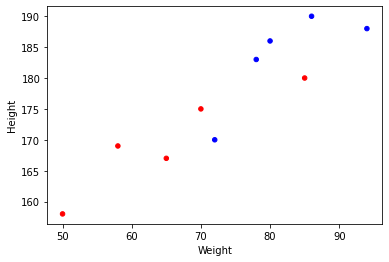

In [ ]:
# Scatter Plot
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
teams_df.plot.scatter(x="Weight", y="Height", c="Team")

In [ ]:
#preparing df 

 dollars_pkr=pd.read_csv('/content/drive/MyDrive/Lab12/dollars_pkr.csv')

IndentationError: ignored

In [ ]:
#Line Plot
dollars_pkr.plot.line(x = 'Day', y = 'Rate', title="Dollar to Pkr Rate", grid=True)

In [ ]:
#preparing df
cheese_df = pd.DataFrame({
    "Cheese_Type": ['Brie', 'Cheddar', 'Cheshire', 'Dairylea', 'Lancashire', 'Other', 'Red Leicester', 'Stilton', 'Wensleydale'],
    "People": [9, 23, 7, 9, 8, 7, 14, 11, 12]
})

cheese_df.head()

In [ ]:
#pie plot

cheese_df.plot.pie(y='People',labels=cheese_df['Cheese_Type'],title="Cheese Popularity")

In [ ]:
#preparing df
medals_df = pd.read_csv('/content/drive/MyDrive/ICT-F22 Lab12/Medals.csv')
# medals_df = pd.read_csv('/content/drive/MyDrive/Pandas lab 2/Medals.csv')
medals_df.head()

In [ ]:
# Make bar plot for first 6 countries with gold, silver and bronze on same axis
medals_df[0:6].plot.bar(x='Country', title="Top 6 medals winning countries", grid=True)

### Box Plot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. Box plots divide the data into sections that each contain approximately 25% of the data in that set. Box plot explains data trend of the distribution

In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

https://www.simplypsychology.org/boxplots.html?__cf_chl_f_tk=yPkNAOVbS1u1t9OBfBhwEWH2f9Og2g3V5nAiCLhIKqY-1642330993-0-gaNycGzNCL0

In [ ]:
# Box Plot
medals_df.plot.box(title="Box and whisker plot", grid=True)

# Tasks



In [ ]:
#preparing datasets for task 1 and 2

#first dataset
df1 = pd.DataFrame({
    "city": ["Pakistan","chicago","orlando", "Pakistan", "baltimore"],
    "temperature": [21,14,35, 21,38],
})
print(df1)

        city  temperature
0   Pakistan           21
1    chicago           14
2    orlando           35
3   Pakistan           21
4  baltimore           38


In [ ]:

#second dataset

df2 = pd.DataFrame({
    "city": ["chicago","san diego","new york","san diego"],
    "humidity": [65,71, 68, 71],
})
print(df2)

        city  humidity
0    chicago        65
1  san diego        71
2   new york        68
3  san diego        71


##Task 1: Update both dataframes such that they no longer have any duplicate rows. Show outputs for each of them.

In [ ]:
#write your code here for df1
emp_df1 = pd.DataFrame(df1, 
                  columns = ['city', 'temperature'])
df1_filtered = emp_df1[~filt]

df1_filtered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,city,temperature
0,Pakistan,21
1,chicago,14
2,orlando,35


In [ ]:
#write your code here for df2
emp_df2 = pd.DataFrame(df2, 
                  columns = ['city', 'humidity'])
df2_filtered = emp_df2[~filt]

df2_filtered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,city,humidity
0,chicago,65
1,san diego,71
2,new york,68


##Task 2a: Choose an appropriate join and merge both dataframes such that no city is excluded.

In [ ]:
#write your code here
df1 = pd.DataFrame({
    "city": ["Pakistan","chicago","orlando", "Pakistan", "baltimore"],
    "temperature": [21,14,35, 21,38],
})
df2 = pd.DataFrame({
    "city": ["chicago","san diego","new york","san diego"],
    "humidity": [65,71, 68, 71],})
join=pd.merge(df1,df2,on='city')

print(join)

 
 

,city,temperature,humidity
0,chicago,14,65


##Task 2b: Choose an appropriate join and merge both dataframes such that only cities with complete information (humidity and temperature) are retained.

In [ ]:
#write your code here
df1 = pd.DataFrame({
    "city": ["Pakistan","chicago","orlando", "Pakistan", "baltimore"],
    "temperature": [21,14,35, 21,38],
})
df2 = pd.DataFrame({
    "city": ["chicago","san diego","new york","san diego"],
    "humidity": [65,71, 68, 71],})

outer_join=pd.merge(df1,df2,on='city',how='outer')

outer_join


,city,temperature,humidity
0,Pakistan,21.0,NaN
1,Pakistan,21.0,NaN
2,chicago,14.0,65.0
3,orlando,35.0,NaN
4,baltimore,38.0,NaN
5,san diego,NaN,71.0
6,san diego,NaN,71.0
7,new york,NaN,68.0


##Task 2c: Choose an appropriate join and merge both dataframes such that only cities from df1 are retained.

In [ ]:
#write your code here
df1 = pd.DataFrame({
    "city": ["Pakistan","chicago","orlando", "Pakistan", "baltimore"],
    "temperature": [21,14,35, 21,38],
})
df2 = pd.DataFrame({
    "city": ["chicago","san diego","new york","san diego"],
    "humidity": [65,71, 68, 71],})

left_join = pd.merge(df1, df2, how = 'left')
 
print(left_join)

        city  temperature  humidity
0   Pakistan           21       NaN
1    chicago           14      65.0
2    orlando           35       NaN
3   Pakistan           21       NaN
4  baltimore           38       NaN


##Task 2d: Choose an appropriate join and merge both dataframes such that only cities from df2 are retained.

In [ ]:
#write your code here
df1 = pd.DataFrame({
    "city": ["Pakistan","chicago","orlando", "Pakistan", "baltimore"],
    "temperature": [21,14,35, 21,38],
})
df2 = pd.DataFrame({
    "city": ["chicago","san diego","new york","san diego"],
    "humidity": [65,71, 68, 71],})

right_join = pd.merge(df1, df2, how = 'right')
 
print(right_join)

        city  temperature  humidity
0    chicago         14.0        65
1  san diego          NaN        71
2   new york          NaN        68
3  san diego          NaN        71


##Task 3a

In [ ]:
#preparing dataset for task 3

df3 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "chicago","baltimore", "baltimore", "new york", "chicago", "new york", "orlando", "san diego"],
    "temperature": [21,14,35, 38, 29, 11, 34, 24, 23, 27, 32],
    "humidity": [65, 68, 64, 71, 65, 73, 72, 66, 67, 70, 69]
})
df3

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,64
3,chicago,38,71
4,baltimore,29,65
5,baltimore,11,73
6,new york,34,72
7,chicago,24,66
8,new york,23,67
9,orlando,27,70


##Task 3b: Using the dataframe you created in 3a, make a bar chart with the cities on the x-axis and their mean temperature on the y-axis.

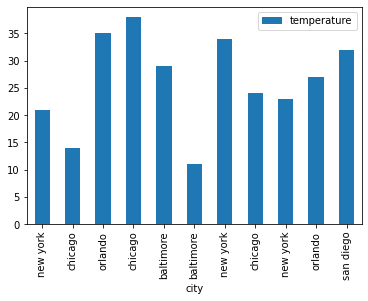

In [ ]:
#write your code here
df3.plot.bar(x="city", y="temperature")

##Task 5c: Now, make a bar chart show the number of times each city appeared (i.e., their counts)

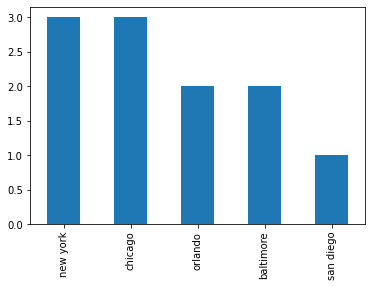

In [ ]:
#write your code here

count=df3['city'].value_counts()
count.plot.bar(x="city", y="count")

## Task 4: More Data Visualization

For the provided dataframes in each of the following parts, make the required plot.

##Task : Make a scatter plot of followoing data frame



In [ ]:

# Prepare data
data={'Name':['Ali', 'Alishba', 'Saad',
              'Sadia', 'zara', 'noor', 'abbas'],
      'Age':[20, 18, 27, 50, 12, 15,17]}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);

print(df)

      Name  Age
0      Ali   20
1  Alishba   18
2     Saad   27
3    Sadia   50
4     zara   12
5     noor   15
6    abbas   17


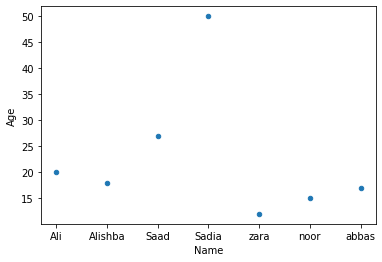

In [ ]:
#write your code here
df.plot.scatter(x="Name",y="Age")


import pandas as pd
path='/content/drive/MyDrive/Lab12/student.xlsx'
mydata = pd.read_excel(path)
print(mydata)##Task 5: Load student dataset and plot following graphs accordingly



## Task 5a: plot a line graph showing Number of students in each class.

In [12]:
#write your code here
import pandas as pd
path='/content/drive/MyDrive/Lab12/student.xlsx'
mydata = pd.read_excel(path)
print(mydata)

    id         name  class  mark  gender
0    1     John Deo   Four    75  female
1    2     Max Ruin  Three    85    male
2    3       Arnold  Three    55    male
3    4   Krish Star   Four    60  female
4    5    John Mike   Four    60  female
5    6    Alex John   Four    55    male
6    7  My John Rob   Five    78    male
7    8       Asruid   Five    85    male
8    9      Tes Qry    Six    78    male
9   10     Big John   Four    55  female
10  11       Ronald    Six    89  female
11  12        Recky    Six    94  female
12  13          Kty  Seven    88  female
13  14         Bigy  Seven    88  female
14  15     Tade Row   Four    88    male
15  16        Gimmy   Four    88    male
16  17        Tumyu    Six    54    male
17  18        Honny   Five    75    male
18  19        Tinny   Nine    18    male
19  20       Jackly   Nine    65  female
20  21   Babby John   Four    69  female
21  22       Reggid  Seven    55  female
22  23        Herod  Eight    79    male
23  24    Tiddy 

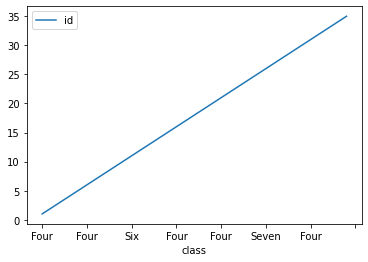

In [16]:

mydata.plot.line(x="class", y="id")

##Task 5b: Plot bar graph showing Class and its Mean mark of each class

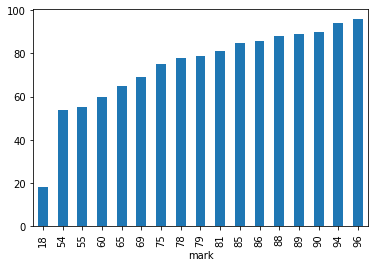

In [13]:
#write your code here
group = mydata.groupby('mark')
mean=group['mark'].mean()
mean.plot.bar(x="class", y="mean")


##Task 5c: Plot bar graph showing Class and its Mean mark and Maximum mark of each class.

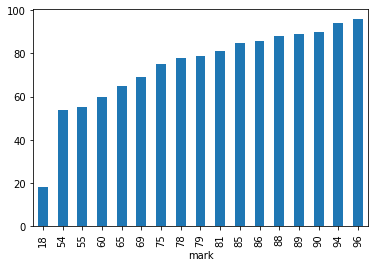

In [14]:
#write your code here
group = mydata.groupby('mark')
mean=group['mark'].mean()
mean.plot.bar(x="class", y="mean")
max=group['mark'].max()
mean.plot.bar(x="class", y="max")



## Task 5d: Create a Pie chart showing Class and number of students.

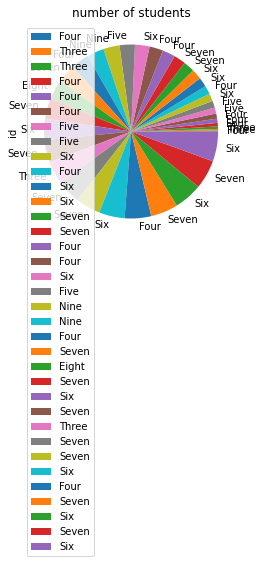

In [ ]:
#write your code here
mydata.plot.pie(y='id',labels=mydata['class'],title="number of students")